In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Set working path
path = '/Users/martinbogaert/Desktop/NBA Data Analysis/2022-2023 Awards Project clean/'

In [4]:
data = pd.read_csv(path + 'Algorithm/roy/roy_data.csv')

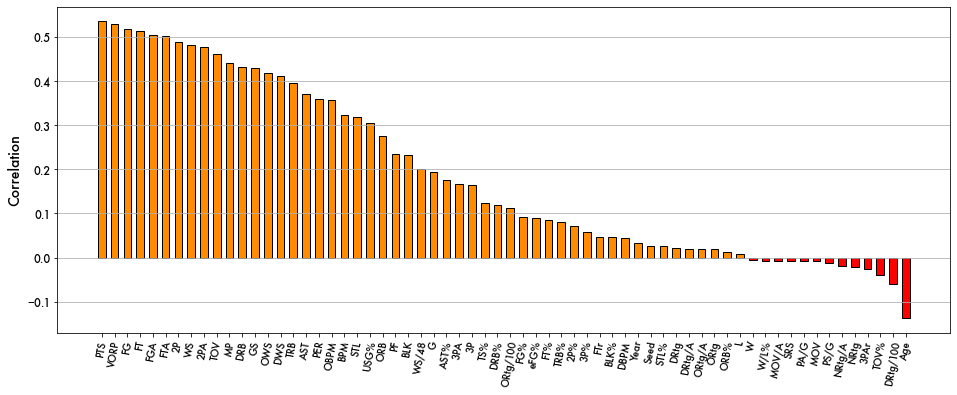

In [5]:
corr_df = data.corr().sort_values('Share', ascending = False)

plt.figure(figsize = (16, 6))

plt.bar(corr_df[corr_df['Share'] >= 0].index[1:], corr_df[corr_df['Share'] >= 0]['Share'][1:],
                        width = 0.6, color = 'darkorange', edgecolor = 'black')
plt.bar(corr_df[corr_df['Share'] < 0].index, corr_df[corr_df['Share'] < 0]['Share'],
                        width = 0.6, color = 'red', edgecolor = 'black')

#plt.plot(range(1, len(corr_df)), corr_df['Share'][1:], alpha = 0.5, linestyle = '-', c = 'black')
plt.xticks(fontname = 'futura', rotation = 80)
plt.yticks(fontname = 'futura', size = 11)
plt.ylabel('Correlation', fontname = 'futura', size = 14)
plt.grid(axis = 'y')
plt.show()

In [6]:
features = ['PTS','VORP','FG','WS','MP','GS','TRB','AST','PER','BPM']

In [7]:
features = ['VORP','FG','WS','MP','GS','TRB','AST','PER','BPM']

In [8]:
years = np.arange(1988, 2023)
dfs = []

for year in years:
    
    print(f'Processing {year-1}-{year} season ...')
    clear_output(wait = True)
    
    X_train = data[data['Year'] < year]
    X_test = data[data['Year'] == year]
    
    rf = RandomForestRegressor(n_estimators = 100, max_features = 'auto', min_samples_leaf = 2)
    rf.fit(X_train[features], X_train['Share'])
    
    # Predict shares of test data
    pred = rf.predict(X_test[features])
    X_test = X_test.assign(pred = pred)
    mse = mean_squared_error(pred, X_test['Share'])
    r2 = r2_score(pred, X_test['Share'])
    
    X_test['Rank'] = [len(X_test[X_test['Share'] > share])+1 for share in X_test['Share']] # Add rank
    X_test['Pred. rank'] = [len(X_test[X_test['pred'] > share])+1 for share in X_test['pred']] # Add predicted rank
    
    X_pred = X_test.sort_values('pred').tail(1)[['Year', 'Player', 'pred', 'Rank']].rename(columns = {'Player' : 'Pred. MVP'})
    X_test = X_test.sort_values('Share').tail(1)[['Year', 'Player', 'Share', 'Pred. rank']].rename(columns = {'Player' : 'MVP'})
    
    dfs.append(X_test.merge(X_pred, on = 'Year').assign(mse = mse, r2 = r2))

Processing 2021-2022 season ...


In [9]:
res = pd.concat(dfs)
res['correct'] = [True if act == pred else False for act, pred in zip(res['MVP'], res['Pred. MVP'])]
print('Accuracy :', round(100*res['correct'].mean(), 2), '%')
print('Mean squared error :', round(res['mse'].mean(), 4))
print('R2-score :', round(res['r2'].mean(), 3))
res.set_index('Year')

Accuracy : 82.86 %
Mean squared error : 0.01
R2-score : -303.912


,MVP,Share,Pred. rank,Pred. MVP,pred,Rank,mse,r2,correct
Year,,,,,,,,,
1988,Mark Jackson,0.963,2,Kenny Smith,0.474257,2,0.014365,-0.244369,False
1989,Mitch Richmond,0.941,1,Mitch Richmond,0.425407,1,0.008376,-0.314906,True
1990,David Robinson,1.000,1,David Robinson,0.531001,1,0.006149,0.132880,True
1991,Derrick Coleman,0.719,2,Lionel Simmons,0.360645,2,0.004893,-0.175413,False
1992,Larry Johnson,0.943,1,Larry Johnson,0.496715,1,0.008044,0.139264,True
1993,Shaquille O'Neal,0.980,1,Shaquille O'Neal,0.714482,1,0.009261,0.474156,True
1994,Chris Webber,0.525,2,Anfernee Hardaway,0.514704,2,0.001534,0.848789,False
1995,Jason Kidd,0.410,5,Grant Hill,0.452976,1,0.004880,0.343733,False
1996,Damon Stoudamire,0.673,1,Damon Stoudamire,0.276575,1,0.004529,-0.049659,True


In [10]:
X_train = data[data['Year'] < 2022]
X_test = data[data['Year'] == 2022]

model = RandomForestRegressor(n_estimators = 100, max_features = 'auto', min_samples_leaf = 2)
model.fit(X_train[features], X_train['Share'])

# Predict shares of test data
pred = model.predict(X_test[features])
X_test = X_test.assign(pred = pred)

X_test['Rank'] = [len(X_test[X_test['Share'] > share])+1 for share in X_test['Share']] # Add rank
X_test['Pred. rank'] = [len(X_test[X_test['pred'] > share])+1 for share in X_test['pred']] # Add predicted rank

In [11]:
res_2022 = X_test.sort_values('Pred. rank')[['Player','Tm','Share', 'Rank', 'Pred. rank','pred']]

In [12]:
tm_col = {'ATL': 'indianred', 'BOS': 'green','BRK': 'lightgray','CHI': 'red','CHO': 'aqua','CLE': 'maroon','DAL': 'cornflowerblue',
          'DEN': 'indigo','DET': 'royalblue','GSW': 'gold','HOU': 'lightcoral','IND': 'y','LAC': 'silver','LAL': 'yellow','MEM': 'skyblue','MIA': 'hotpink',
          'MIL': 'forestgreen','MIN': 'lime','NOP': 'goldenrod','NYK': 'darkorange','OKC': 'dodgerblue','ORL': 'navy',
          'PHI': 'blue','PHO': 'orange','POR': 'rosybrown','SAC': 'mediumslateblue','SAS': 'white','TOR': 'purple',
          'UTA': 'limegreen','WAS': 'midnightblue'}

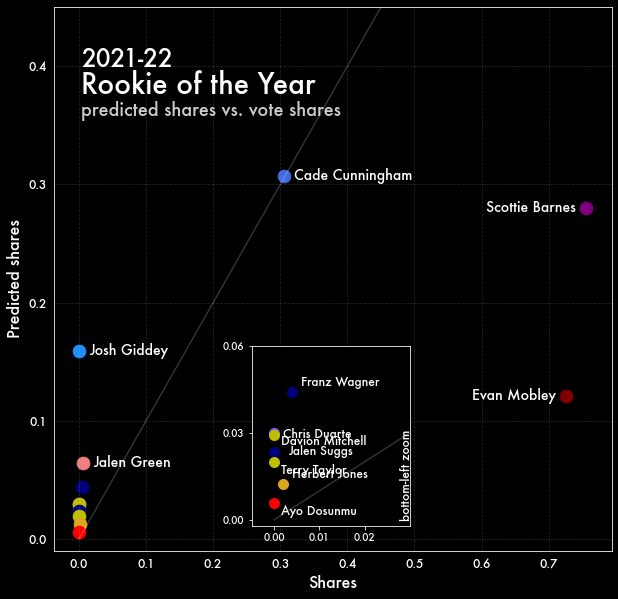

In [13]:
fig, ax = plt.subplots(figsize = (10, 10), facecolor = 'black')

plt.plot([0, max(res_2022['Share'].max(), res_2022['pred'].max())], [0, max(res_2022['Share'].max(), res_2022['pred'].max())], c = 'white', alpha = 0.2)

for player, share, pred, tm in zip(res_2022['Player'], res_2022['Share'], res_2022['pred'], res_2022['Tm']) :
    
    if pred > 0.005 or share > 0:
        plt.scatter(share, pred, c = tm_col.get(tm), s = 160)
        
        if player == 'Scottie Barnes' or player == 'Evan Mobley':
            plt.annotate(player, xy = (share - 0.015, pred), fontname = 'futura', color = 'white', size = 14, va = 'center', ha = 'right')
            
      #  elif player == 'Cade Cunningham' or player == 'Josh Giddey':
       #     plt.annotate(player, xy = (share + 0.015, pred), fontname = 'futura', color = 'white', size = 14, va = 'center', ha = 'left')

        elif pred > 0.05 or share > 0.2 :
            plt.annotate(player, xy = (share + 0.015, pred), fontname = 'futura', color = 'white', size = 14, va = 'center')
      
plt.ylabel('Predicted shares', color = 'white', size = 16, fontname = 'futura')
plt.xlabel('Shares', color = 'white', size = 16, fontname = 'futura')
plt.xticks(color = 'white', fontname = 'futura', size = 12)
plt.yticks(color = 'white', fontname = 'futura', size = 12)
plt.grid(linestyle = '--', alpha = 0.2)

### ANNOTATION ###
# Title
plt.annotate('2021-22', xy = (1/20, 0.89), fontname = 'futura', size = 24, xycoords = 'axes fraction', weight = 'bold', color = 'white') 
plt.annotate('Rookie of the Year', xy = (1/20, 0.84), fontname = 'futura', size = 28, xycoords = 'axes fraction', weight = 'bold', color = 'white')
# Sub-title
plt.annotate('predicted shares vs. vote shares', xy = (1/20, 0.8), fontname = 'futura', size = 18, xycoords = 'axes fraction', color = 'white', alpha = 0.8)
# Signature
#plt.annotate('@      .', xy = (0.875, 0.16), fontname = 'futura', size = 14, alpha = 1, xycoords = 'axes fraction', color = 'white')
#plt.annotate('nba', xy = (0.9, 0.16), fontname = 'futura', size = 14, alpha = 1, xycoords = 'axes fraction', color = '#ff9000')
#plt.annotate('ai', xy = (0.95, 0.16), fontname = 'futura', size = 14, alpha = 1, xycoords = 'axes fraction', color = '#ff58c4')

ax.spines['left'].set_color('white'); ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white'); ax.spines['top'].set_color('white')
ax_gca = plt.gca()
plt.ylim([-0.01,0.45])
ax_gca.set_facecolor('black')

########

newax = fig.add_axes([0.4,0.16,0.22,0.25], zorder = 1)
newax.plot([0, 0.2], [0, 0.2], c = 'white', alpha = 0.2)

for player, share, pred, tm in zip(res_2022['Player'], res_2022['Share'], res_2022['pred'], res_2022['Tm']) :
    
    if share < 0.1 and pred < 0.05 :
        if share > 0 or pred > 0.005 :
            newax.scatter(share, pred, c = tm_col.get(tm), s = 100)
            
            if player == 'Franz Wagner' or player == 'Herbert Jones' or player == 'Kevin Durant' or player == 'Jimmy Butler' :
                newax.annotate(player, xy = (share+0.002, pred+0.001), fontname = 'futura', color = 'white', size = 12, va = 'bottom')
            elif player == 'Jalen Suggs' :
                newax.annotate(player, xy = (share+0.003, pred), fontname = 'futura', color = 'white', size = 12, va = 'center')
            elif player == 'Davion Mitchell' or player == 'Terry Taylor' or player == 'Ayo Dosunmu':
                newax.annotate(player, xy = (share+0.0015, pred-0.0005), fontname = 'futura', color = 'white', size = 12, va = 'top')
            else :
                newax.annotate(player, xy = (share+0.002, pred), fontname = 'futura', color = 'white', size = 12, va = 'center')

newax.set_xticks([0, 0.01, 0.02])
newax.set_yticks([0, 0.03, 0.06])
newax.tick_params(colors = 'white')

labels = newax.get_xticklabels() + newax.get_yticklabels()
[label.set_fontname('futura') for label in labels]

newax.annotate('bottom-left zoom', xy = (0.94, 1/25), fontname = 'futura', size = 12, xycoords = 'axes fraction', color = 'white', rotation = 90) 
newax.spines['left'].set_color('white'); newax.spines['right'].set_color('white')
newax.spines['bottom'].set_color('white'); newax.spines['top'].set_color('white')
newax.set_xlim([-0.005, 0.03]); newax.set_ylim([-0.002, 0.06])
ax_gca = plt.gca()
ax_gca.set_facecolor('black')

#plt.savefig(path + 'roy_2022_test.jpg', dpi = 300)
plt.show()

In [14]:
res_2022

,Player,Tm,Share,Rank,Pred. rank,pred
2035,Cade Cunningham,DET,0.306,3,1,0.307357
2025,Scottie Barnes,TOR,0.756,1,2,0.280274
1983,Josh Giddey,OKC,0.000,7,3,0.159062
2034,Evan Mobley,CLE,0.726,2,4,0.120605
2006,Jalen Green,HOU,0.006,4,5,0.064338
1989,Franz Wagner,ORL,0.004,5,6,0.043957
1988,Davion Mitchell,SAC,0.000,7,7,0.030013
1991,Chris Duarte,IND,0.000,7,8,0.029345
1990,Jalen Suggs,ORL,0.000,7,9,0.023368
1995,Terry Taylor,IND,0.000,7,10,0.019801
